In [1]:
import pandas as pd

# xyz 파일을 구문 분석할 함수를 정의
def parse_xyz(filepath):
    # Initialize lists to hold molecule data
    molecules = []
    current_molecule = {}
    
    # 파일을 열고 한 줄씩 읽기
    with open(filepath, 'r') as file:
        while True:
            # 분자의 원자 수를 읽어라
            line = file.readline()
            if not line:
                break  # EOF
            num_atoms = int(line.strip())
            
            # 설명 줄 읽기(추가 데이터 포함 가능)
            comment = file.readline().strip()
            
            # 이 분자의 데이터를 저장하기 위해 목록을 초기화합니다
            atoms = []
            coordinates = []
            
            # 각 원자의 데이터를 읽는다
            for _ in range(num_atoms):
                atom_data = file.readline().strip().split()
                atoms.append(atom_data[0])  # Atom type
                # Atom coordinates
                coordinates.append([float(coord) for coord in atom_data[1:4]])
            
            # 분자의 데이터 저장
            current_molecule = {
                'num_atoms': num_atoms,
                'comment': comment,
                'atoms': atoms,
                'coordinates': coordinates
            }
            molecules.append(current_molecule)
    
    return molecules


In [2]:
# 훈련 데이터 구문 분석
train_data = parse_xyz('C:/Users/82106/Desktop/데이터분석 프로젝트/삼성 경진대회/open/train.xyz')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 세트에서 특징 및 레이블 추출
def extract_features_labels(molecules):
    features = []
    labels = []

    for molecule in molecules:
        # Flatten the coordinates and forces into a single list
        # Note: This is a simplistic approach and might not be the best representation
        flat_coordinates = np.array(molecule['coordinates']).flatten()
        # Extract energy as the label
        energy = float(molecule['comment'].split()[5])
        
        features.append(flat_coordinates)
        labels.append(energy)
    
    return features, labels

# 훈련 데이터에서 특징 및 레이블 추출
features, labels = extract_features_labels(train_data)

In [8]:
import numpy as np
# 레이블 목록을 통계 분석을 위해 numpy 배열로 변환
labels_array = np.array(labels)

# Basic Statistical Analysis
basic_stats = {
    "Mean": np.mean(labels_array),
    "Median": np.median(labels_array),
    "Standard Deviation": np.std(labels_array),
    "Minimum": np.min(labels_array),
    "Maximum": np.max(labels_array)
}

basic_stats

{'Mean': -0.0006441068231896949,
 'Median': 0.0,
 'Standard Deviation': 0.15506198230240179,
 'Minimum': -0.82382123,
 'Maximum': 1.81211066}

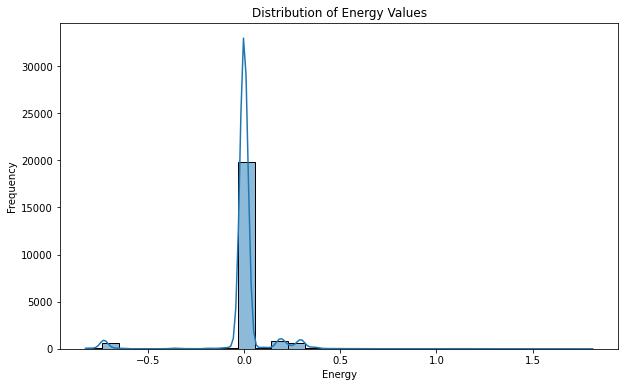

{'Mean': -0.0006441068231896949,
 'Median': 0.0,
 'Standard Deviation': 0.15506198230240179,
 'Minimum': -0.82382123,
 'Maximum': 1.81211066}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 레이블 목록을 통계 분석을 위해 numpy 배열로 변환
labels_array = np.array(labels)

# 기초통계분석
basic_stats = {
    "Mean": np.mean(labels_array),
    "Median": np.median(labels_array),
    "Standard Deviation": np.std(labels_array),
    "Minimum": np.min(labels_array),
    "Maximum": np.max(labels_array)
}

# 에너지 분포의 시각화
plt.figure(figsize=(10, 6))
sns.histplot(labels_array, kde=True, bins=30)
plt.title("Distribution of Energy Values")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

basic_stats


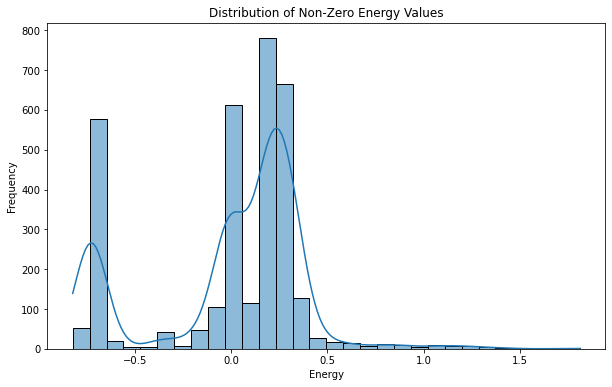

In [10]:
# 에너지 배열에서 0 값 제거
non_zero_energies = labels_array[labels_array != 0]

# 0이 없는 에너지 분포의 시각화
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_energies, kde=True, bins=30)
plt.title("Distribution of Non-Zero Energy Values")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# 데이터 집합에서 x, y, z 좌표 추출
x_coordinates = [coord[0] for molecule in train_data for coord in molecule['coordinates']]
y_coordinates = [coord[1] for molecule in train_data for coord in molecule['coordinates']]
z_coordinates = [coord[2] for molecule in train_data for coord in molecule['coordinates']]

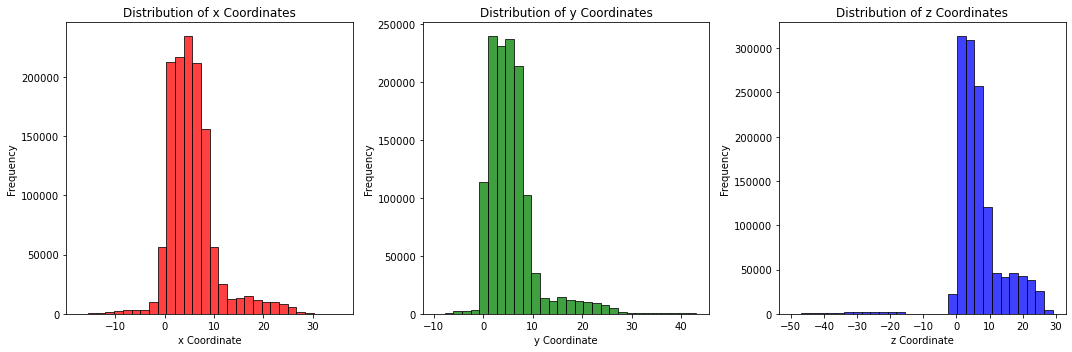

In [11]:
# 좌표분포의 시각화
plt.figure(figsize=(15, 5))

# x좌표에 대한 그림
plt.subplot(1, 3, 1)
sns.histplot(x_coordinates, bins=30, color='red')
plt.title("Distribution of x Coordinates")
plt.xlabel("x Coordinate")
plt.ylabel("Frequency")

# y좌표에 대한 그림
plt.subplot(1, 3, 2)
sns.histplot(y_coordinates, bins=30, color='green')
plt.title("Distribution of y Coordinates")
plt.xlabel("y Coordinate")
plt.ylabel("Frequency")

# z좌표에 대한 그림
plt.subplot(1, 3, 3)
sns.histplot(z_coordinates, bins=30, color='blue')
plt.title("Distribution of z Coordinates")
plt.xlabel("z Coordinate")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
# parse_xyz 함수 정의
def parse_xyz(filepath):
    molecules = []
    with open(filepath, 'r') as file:
        while True:
            line = file.readline()
            if not line:
                break
            num_atoms = int(line.strip())
            comment = file.readline().strip()
            coordinates = []
            for _ in range(num_atoms):
                atom_data = file.readline().strip().split()
                coordinates.append([float(coord) for coord in atom_data[1:4]])
            energy = float(comment.split()[5])
            molecules.append({'num_atoms': num_atoms, 'energy': energy, 'coordinates': coordinates})
    return molecules

# training data
train_data = parse_xyz('C:/Users/82106/Desktop/삼성 경진대회/open/train.xyz')


In [12]:
# 에너지 및 평균 좌표 추출
energies = [molecule['energy'] for molecule in train_data]
mean_x = [np.mean([coord[0] for coord in molecule['coordinates']]) for molecule in train_data]
mean_y = [np.mean([coord[1] for coord in molecule['coordinates']]) for molecule in train_data]
mean_z = [np.mean([coord[2] for coord in molecule['coordinates']]) for molecule in train_data]

# 상관 분석을 위한 데이터 프레임 생성
correlation_data = pd.DataFrame({
    'Energy': energies,
    'Mean_X': mean_x,
    'Mean_Y': mean_y,
    'Mean_Z': mean_z
})

# 상관 행렬 계산
correlation_matrix_numerical = correlation_data.corr()
correlation_matrix_numerical


,Energy,Mean_X,Mean_Y,Mean_Z
Energy,1.000000,0.032760,0.056205,-0.065897
Mean_X,0.032760,1.000000,0.863007,0.510445
Mean_Y,0.056205,0.863007,1.000000,0.460780
Mean_Z,-0.065897,0.510445,0.460780,1.000000


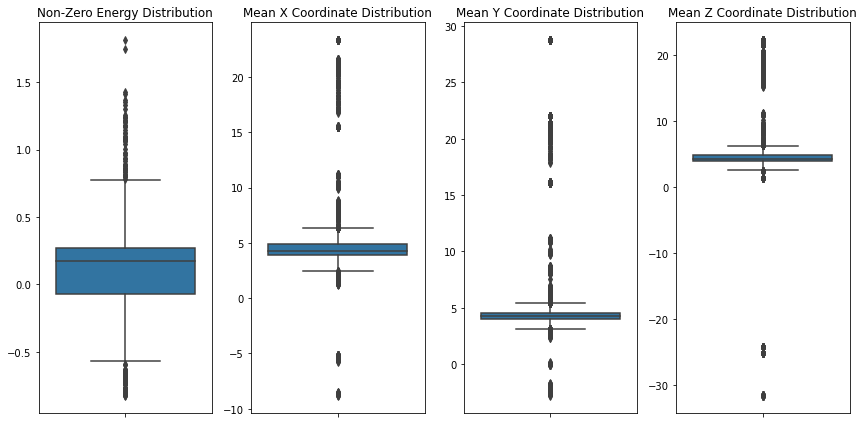

In [13]:
# 에너지 및 평균 좌표에 대한 상자 그림 만들기
plt.figure(figsize=(12, 6))

# 상자 그림에 대한 에너지 배열에서 0 값 제거
non_zero_energies = np.array(energies)[np.array(energies) != 0]

# 0이 아닌 에너지 분포에 대한 상자 그림 생성
plt.subplot(1, 4, 1)
sns.boxplot(y=non_zero_energies)
plt.title('Non-Zero Energy Distribution')

# 평균 x 좌표에 대한 상자 그림
plt.subplot(1, 4, 2)
sns.boxplot(y=mean_x)
plt.title('Mean X Coordinate Distribution')

# 평균 y좌표에 대한 상자 그림
plt.subplot(1, 4, 3)
sns.boxplot(y=mean_y)
plt.title('Mean Y Coordinate Distribution')

# 평균 z좌표에 대한 상자 그림
plt.subplot(1, 4, 4)
sns.boxplot(y=mean_z)
plt.title('Mean Z Coordinate Distribution')

plt.tight_layout()
plt.show()
